In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import yfinance as yf

# Get the data for the stock AAPL
data = yf.download('GC=F','2016-04-26','2024-04-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline


stock = data['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Next, we calculate the number of days that have elapsed for every price point.
time_elapsed = (stock.index[-1] - stock.index[0]).days

# Then, we compute the compounded annual growth rate (cagr) by taking the ratio between the closing price and the opening price and rasing that value to
# the inverse of the number of years elapsed then substract 1 (in order to make it a percentage of growth).
price_ratio = (stock.iloc[-1] / stock.iloc[0])  # Use iloc for integer-based positional indexing
inverse_number_of_years = 365.0 / time_elapsed
cagr = price_ratio ** inverse_number_of_years - 1

# Now, let's determine the annual volatility of returns. Volatility is the standard deviation of the percent changes in price for each day. This makes
# sense since it is a measure of how sporadically the price of the stock is changing.
vol = stock.pct_change().std()

# Now, in order to make this figure useful as an annual measure, it has to be scaled by an annualization factor. This factor is most often the square root
# of the number of trading days in a year which happens to be 252.
number_of_trading_days = 252
vol = vol * math.sqrt(number_of_trading_days)

print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("vol (standard deviation of return : )", str(round(vol,4)))

cagr (mean returns) :  Ticker
GC=F    0.1087
dtype: float64
vol (standard deviation of return : ) Ticker
GC=F    0.1448
dtype: float64


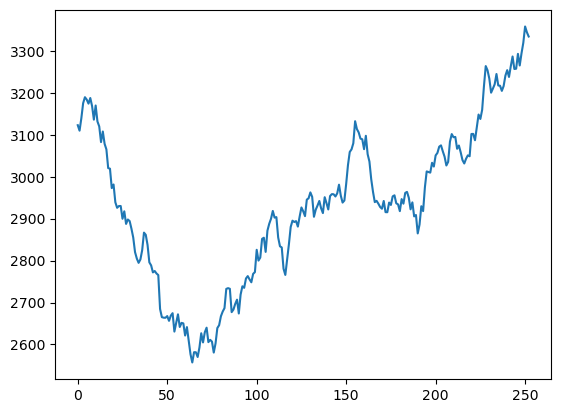

In [5]:
# Perfect! This is all we need to model a standard deviation of stock prices. Now, let's actually create a random sample using these parameters. For this,
# we'll use the normal function from the numpy library.
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1

# Alright. Now that we have a list of return percentages. Let's create a price series from this list. We'll start with the most recent price and go from
# there. Then, in order to generate each consecutive price, we will apply the price change to the most recent price. This will result in a distribution
# called a "random walk".
price_series = [stock.iloc[-1]]

for drp in daily_return_percentages:
    price_series.append(price_series[-1] * drp)

plt.plot(price_series)
plt.show()

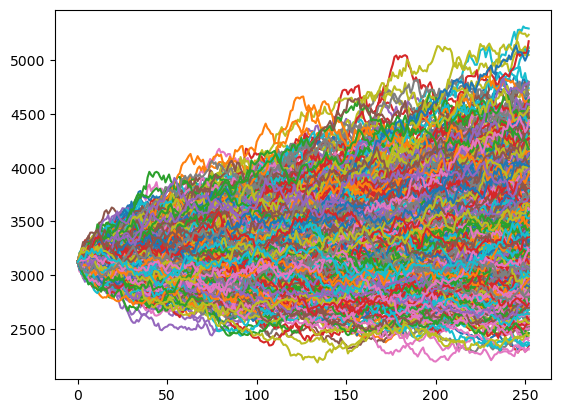

In [6]:
number_of_trials = 1000
for i in range(number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [stock.iloc[-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)

    plt.plot(price_series)
plt.show()

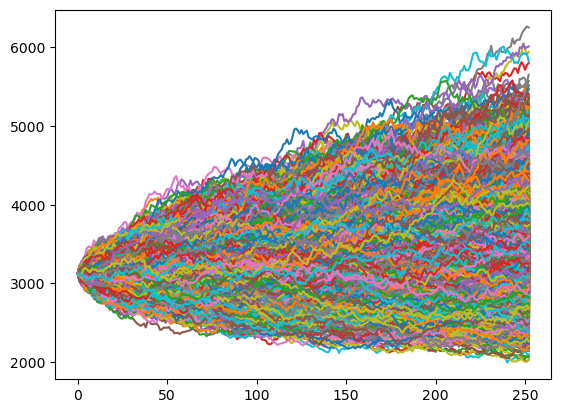

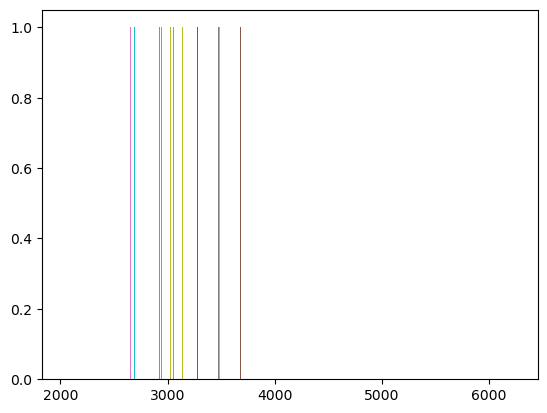

In [7]:
ending_price_points = []
larger_number_of_trials = 15000 # It's over 9000
for i in range(larger_number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [stock.iloc[-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)

    plt.plot(price_series)

    ending_price_points.append(price_series[-1])

plt.show()

plt.hist(ending_price_points,bins=50)
plt.show()

In [8]:
# Now, let's get the mean of this distribution in order to get an expected value of our ending price points
expected_ending_price_point = round(np.mean(ending_price_points),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))

Expected Ending Price Point :  3485.28


In [10]:
# Due to the Law of Large Numbers, this number (which you can think of as the sample mean) will eventually converge to the last, known price point
# multiplied by the expected daily price change (the population mean).
population_mean = (cagr+1) * stock.iloc[-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  3485.28
Population Mean:  Ticker
GC=F    3462.22
dtype: float64
Percent Difference :  Ticker
GC=F   -0.67
dtype: float64 %


In [ ]:
# The true usefulness of Monte Carlo simulations, though, is to see the distribution of ending price points and guage risk vs. reward. Let's take the top
# 10 and bottom 10 percentiles.
top_ten = np.percentile(ending_price_points,100-10)
bottom_ten = np.percentile(ending_price_points,10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  263.21
Bottom 10% :  126.0


NameError: name 'top_ten' is not defined

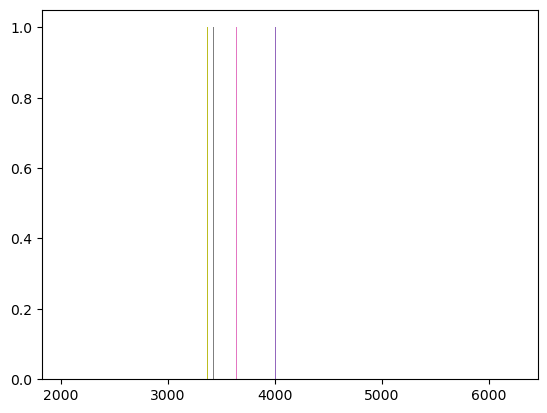

In [11]:
# To illustrate this situation, let's draw the top ten and bottom ten percentiles on the histogram as well as the last known price point.
plt.hist(ending_price_points,bins=100)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axhline(stock.iloc[-1],color='g', linestyle='dashed',linewidth=2)
plt.show()